Instiituto Tecnológico de Costa Rica

Escuela de Ingeniería Física

Física Computacional

Tarea 2

Alonso Jiménez Moya (2019031476)

Profesores:
Álvaro Amador Jara
Jose Esteban Pérez Hidalgo

I Semestre 2022

# Procesamiento señal ruidosa

Se seleccionan por medio de dos señales con frecuencias seleccionadas como frequency1 y fequency2. Con magnitudes distintas y ambas de tipo coseno trigonométrico.

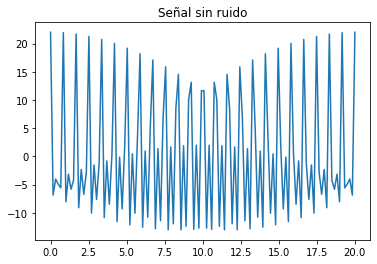

In [1]:
#procesamiento senal ruidosa
import numpy as np
from scipy.fft import fft
from scipy.fft import ifft
import matplotlib.pyplot as plt

frequency1 = 25
frequency2 = 50
magnitude1 = 10
magnitude2 = 12
timePoints = np.linspace(0, 20, 120)
signal1 = magnitude1 * np.cos(2*np.pi*frequency1*timePoints)
signal2 = magnitude2 * np.cos(2*np.pi*frequency2*timePoints)
# Se realiza la suma de las dos señales distintas con frecuencia y magnitud variante, se almacena en normalSignal
normalSignal = signal1 + signal2
fig1, ax1 = plt.subplots()
ax1.plot(timePoints, normalSignal)
ax1.set_title("Señal sin ruido")
plt.show()

Se agrega ruido a dicha señal por medio de una función normal entre 0 y 10 con 120 puntos.

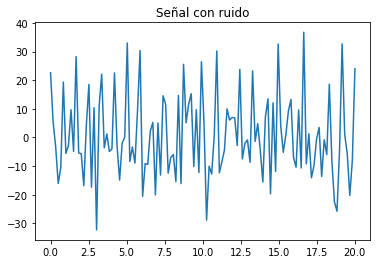

In [2]:
#Se crea una señal con ruido a partir de los parametros de los límites, y los puntos que se desea generar aleatorios, 
#se almacena en noise signal
noise = np.random.normal(0, 10, 120)
noiseSignal = normalSignal + noise
fig2, ax2 = plt.subplots()
ax2.plot(timePoints, noiseSignal)
ax2.set_title("Señal con ruido")
plt.show()

A la señal ruidosa se le calcula la transformada rápida de Fourier. Las frecuencias se grafican pero en el mismo dominio de la señal ruidosa, sin embargo, representan las frecuencias de la fucnioín en un dominio de las frecuencias.

C:\Users\alons\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


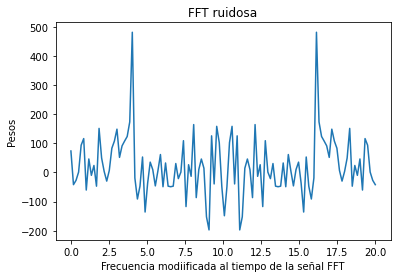

In [3]:
fftSignal = fft(noiseSignal)
fig3, ax3 = plt.subplots()
ax3.plot(timePoints, fftSignal)
ax3.set_title("FFT ruidosa")
ax3.set_xlabel("Frecuencia modiificada al tiempo de la señal FFT")
ax3.set_ylabel("Pesos")
plt.show()

Dicha transformada de Fourier se calcula el gráfico de las frecuencias donde lo importante es la magnitud o el peso de la frecuencia para generar la gráfica.

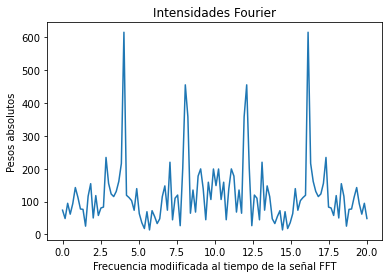

In [4]:
fftIntensity = np.abs(fftSignal)
fig4, ax4 = plt.subplots()
ax4.plot(timePoints, fftIntensity)
ax4.set_title("Intensidades Fourier")
ax4.set_xlabel("Frecuencia modiificada al tiempo de la señal FFT")
ax4.set_ylabel("Pesos absolutos")
plt.show()

Se filtran estas frecuencias para un valor de pesos que filtren unicamente dos frecuencias, estas son las seleccionadas en frequency1 y frequency2. La razón por la que se observan 4 frecuencias es debido a la naturaleza algoritmica de fft, repite el dominio de frecuencias como un espejo en la mitad del gráfico. A esat señal filtada, al calcular la transformada inversa de Fourier muestra una aproximación de la señal original.

C:\Users\alons\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


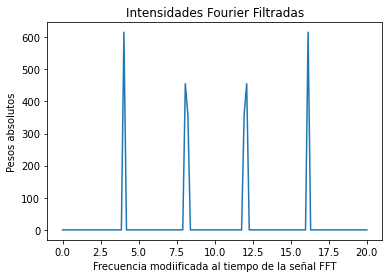

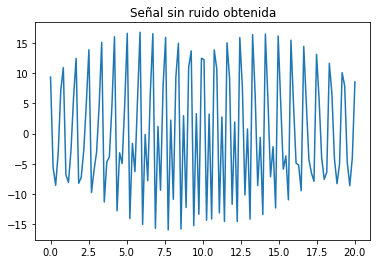

In [5]:
#La variable filtered guardará únicamente las intensidades mayor a el valor dado como un uno en dicha posición.
filtered = fftIntensity > 275
#Se consigue señal deseada
filtered = filtered * fftSignal
#Se calcula la señal inversa de la Fourier filtrada.
filteredIFFT = ifft(filtered)
fig5, ax5 = plt.subplots()
ax5.plot(timePoints, np.abs(filtered))
ax5.set_title("Intensidades Fourier Filtradas")
ax5.set_xlabel("Frecuencia modiificada al tiempo de la señal FFT")
ax5.set_ylabel("Pesos absolutos")
fig6, ax6 = plt.subplots()
ax6.plot(timePoints, filteredIFFT)
ax6.set_title("Señal sin ruido obtenida")
plt.show()

# Señal de Audio

Se importa los parametros a continuación para graficar la señal.

In [6]:
from scipy.io.wavfile import read
from scipy.fft import fft, ifft
#Devuelve una tupla con los valores de la frecuencia de muestreo sobre la que se debe hacer el audio y los datos del mismo
samplerate, data = read('Jimenez_Alonso_audio.wav')
#Parseamos data ya que incluye información auditiva de dos fuentes de sonido pero solo nos interesa una señal 
data = data[:, 0]
#en duration encontramos el tiempo de dicho audio
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate)

A continuación se recomienda con la librería de Ipywidgets, descomentar las siguientes líneas de código para poder escuchar el audio.

In [7]:
#from IPython.display import Audio
#a0 = Audio(data= data, rate = samplerate)
#display(a0)

Se gráfica la señal original de audio.

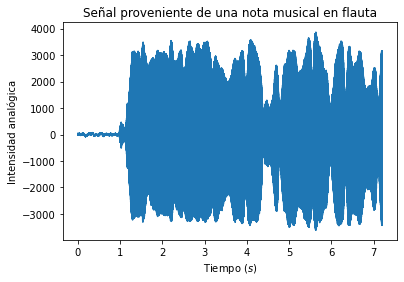

In [8]:
fig, ax = plt.subplots()
ax.plot(time, data)
ax.set_title("Señal proveniente de una nota musical en flauta")
ax.set_xlabel("Tiempo $(s)$")
ax.set_ylabel("Intensidad analógica")
plt.show()

En la siguiente transformada de Fourier se puede observar como no hay mucho ruido en dicha señal, notamos que la frecuencia principal es dominante de la nota musical y las demás frecuencias aparecen de forma repetitiva bajando exponencialmemte mientras se aleja de la frecuencia de la nota.

C:\Users\alons\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


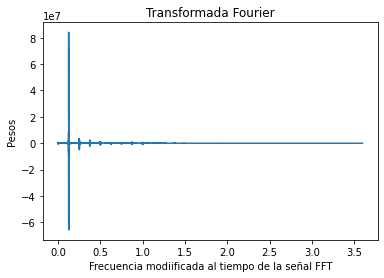

In [9]:
fftSound = fft(data)
fftFilterData = np.abs(fftSound)
time2 = np.arange(0, duration/2, 1/samplerate)
fig1, ax1 = plt.subplots()
#Graficamos una¿icamente la mitad de la transformada de Fourier por medio del siguiente parse, 
#esto para no trabajar duplicados de la información.
ax1.plot(time2, fftSound[0:int(fftSound.size/2)+1])
ax1.set_title("Transformada Fourier")
ax1.set_xlabel("Frecuencia modiificada al tiempo de la señal FFT")
ax1.set_ylabel("Pesos")
plt.show()

Ahora graficamos las intensidades a continuación, como nota esta vez no graficamos el "espejo" dado por la transformada. Las intensidades al igual que el primer problema muestran los pesos de las frecuencias para poder filtrar las frecuencias bajas por medio de las magnitudes.

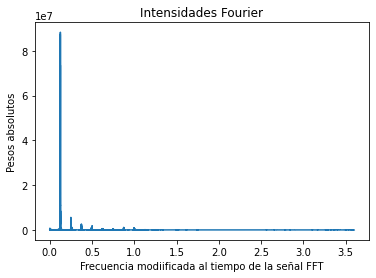

In [10]:
fig2, ax2 = plt.subplots()
ax2.plot(time2, np.abs(fftFilterData[0:int(fftSound.size/2)+1]))
ax2.set_title("Intensidades Fourier")
ax2.set_xlabel("Frecuencia modiificada al tiempo de la señal FFT")
ax2.set_ylabel("Pesos absolutos")
plt.show()

Filtramos el poco ruido que había en la nota musical de la flauta.

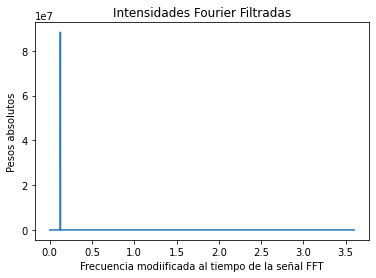

In [11]:
fftFilter = fftFilterData > 2*10**7
fftFilter = fftSound*fftFilter
fig3, ax3 = plt.subplots()
ax3.plot(time2, np.abs(fftFilter[0:int(fftFilter.size/2)+1]))
ax3.set_title("Intensidades Fourier Filtradas")
ax3.set_xlabel("Frecuencia modiificada al tiempo de la señal FFT")
ax3.set_ylabel("Pesos absolutos")
plt.show()

Graficamos la nueva señal filtrada del ruido.

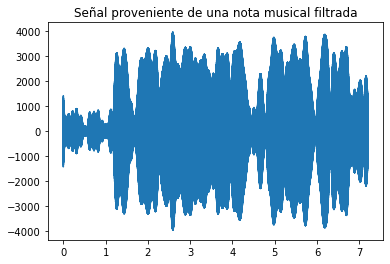

In [12]:
newSound = ifft(fftFilter).real
fig4, ax4 = plt.subplots()
ax4.plot(time, newSound)
ax4.set_title("Señal proveniente de una nota musical filtrada")
ax.set_xlabel("Tiempo $(s)$")
ax.set_ylabel("Intensidad analógica")
plt.show()

Recomendado para escuchar la señal filtrada descomentar las siguientes líneas.

In [13]:
#a1 = Audio(data = newSound, rate = samplerate)
#display(a1)

# Procesamiento de una imagen

Graficamos la imagen original a tratar con ruido

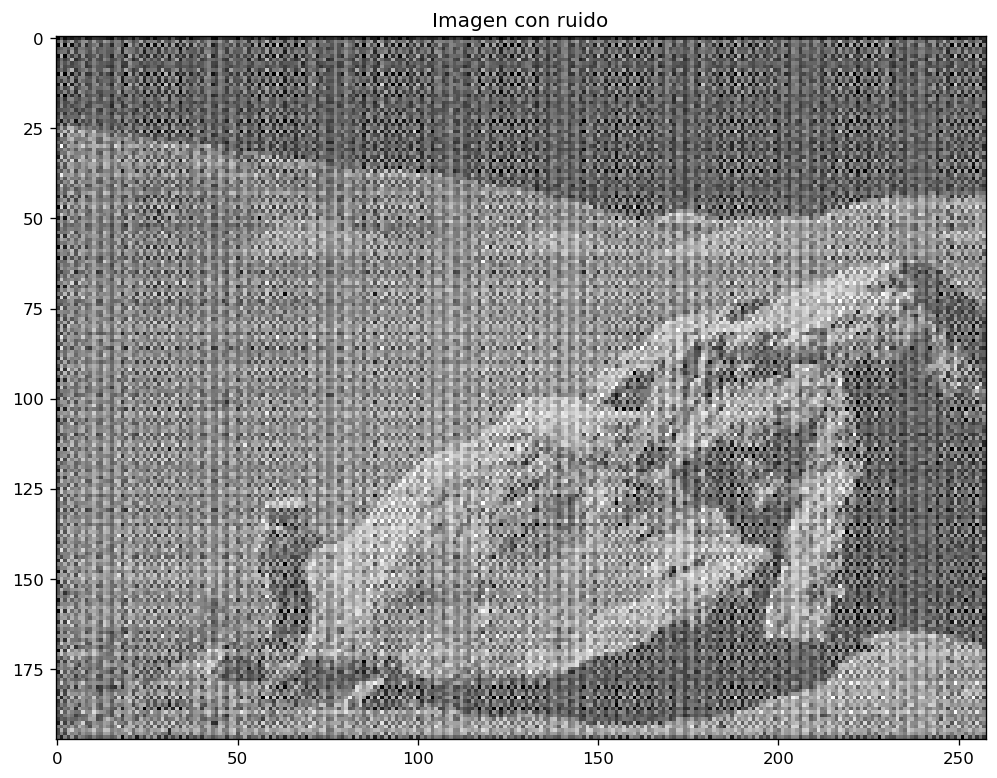

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2
from matplotlib.colors import LogNorm
from scipy.fft import ifft2

img = plt.imread('Jimenez_Alonso_imagen.png').astype(float)
fig, ax = plt.subplots(1, 1, figsize = (10,10), dpi=120)
ax.imshow(img, plt.cm.gray)
ax.set_title("Imagen con ruido")
plt.show()

Por medio de una transformada rápida de Fourier dada por la biblioteca Scipy como fft2, de dos dimensiones calculamos dicha transformada. Cabe notar dado a el algorítmo de fft2, las frecuencias bajas se encontraran cerca del centro de la imagen. Con la escala logarítmica se puede apreciar las magnitudes con código de color de la imagen.

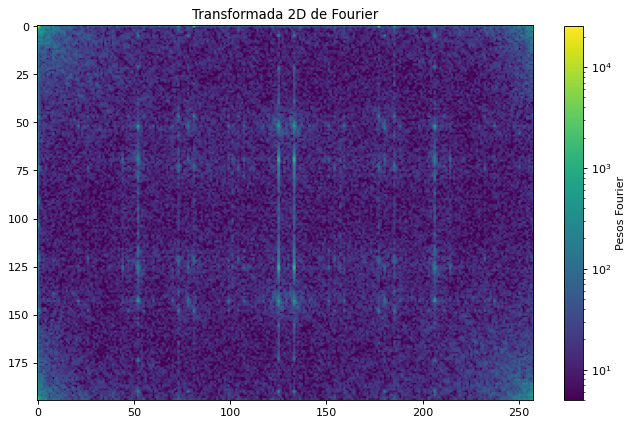

In [15]:
filterImage = fft2(img)
fig2, ax2 = plt.subplots(1, 1, figsize = (10,10), dpi=80)
ax2.set_title("Transformada 2D de Fourier")
graph = ax2.imshow(np.abs(filterImage), norm=LogNorm(vmin=5))
color_bar = fig2.colorbar(graph, ax = ax2, orientation = 'vertical', shrink = 0.62, label = "Pesos Fourier")

Filtamos la señal por medio de la eliminación de la parte real de un radio desde el centro de la imagen, esto porque la densidad de la información de la imagen se encontraá de forma gradiente en las esquinas. Es importante notar que se aplicaron varios filtros y este fue el que mejores resultados arrojó, el radio puede ser variad en el parametro FilterCoeficient y comentado se encuentra otro tipo de filtro que puede tratar la imagen.

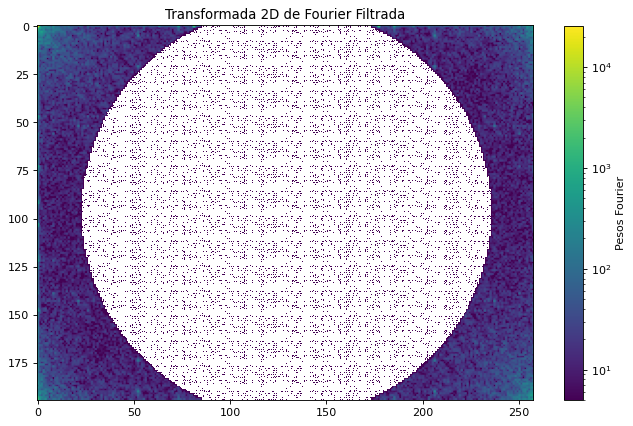

In [16]:
nRows, nColumns = filterImage.shape
center = [int(nRows/2) , int(nColumns/2)]
FilterCoeficient = 0.33
#Las siguintes 4 líneas de código generan un área disceta que define como el valor
# máximo alejado como el radio trigonometrico de las cordenadas rectangulares del punto.
for x in range (nRows):
    for y in range (nColumns):
        if ((np.abs(x).real - center[0])**2+(np.abs(y).real - center[1])**2)**(1/2) < FilterCoeficient*(nRows**2 + nColumns**2)**(1/2):
            filterImage[x,y] = 0
            
#Para que el filtro comentado a continuación funcione debe comentarse el filtro circular            

#filterImage[center[0]-int(FilterCoeficient* nRows):center[0]+int(FilterCoeficient * nRows), center[1]-int(FilterCoeficient * nColumns):center[1]+int(FilterCoeficient * nColumns)] = 0

fig3, ax3 = plt.subplots(1, 1, figsize = (10,10), dpi=80)
graph2 = ax3.imshow(np.abs(filterImage), norm=LogNorm(vmin=5))
ax3.set_title("Transformada 2D de Fourier Filtrada")
color_bar2 = fig3.colorbar(graph2, ax = ax3, orientation = 'vertical', shrink = 0.62, label = "Pesos Fourier")

En la siguiente imegen se puede observar como despues de ser filtrada menos puntos blancos se encuentran en sombras de la imagen y menos puntos oscuros se encuentran en zonas má densamente iluminadas.

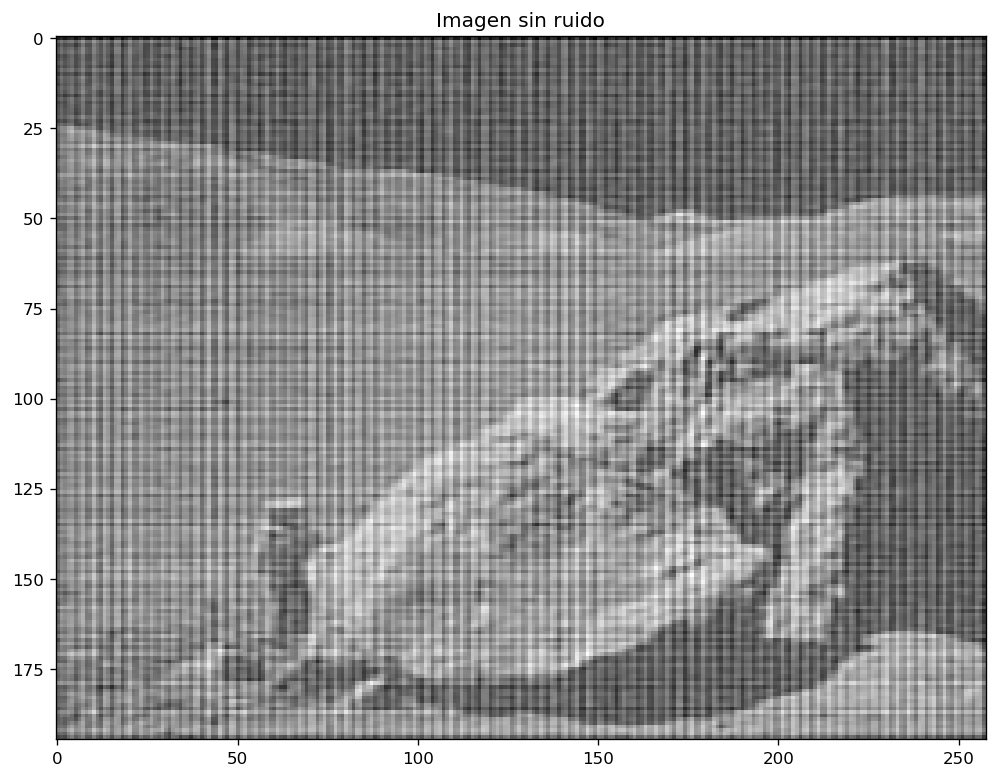

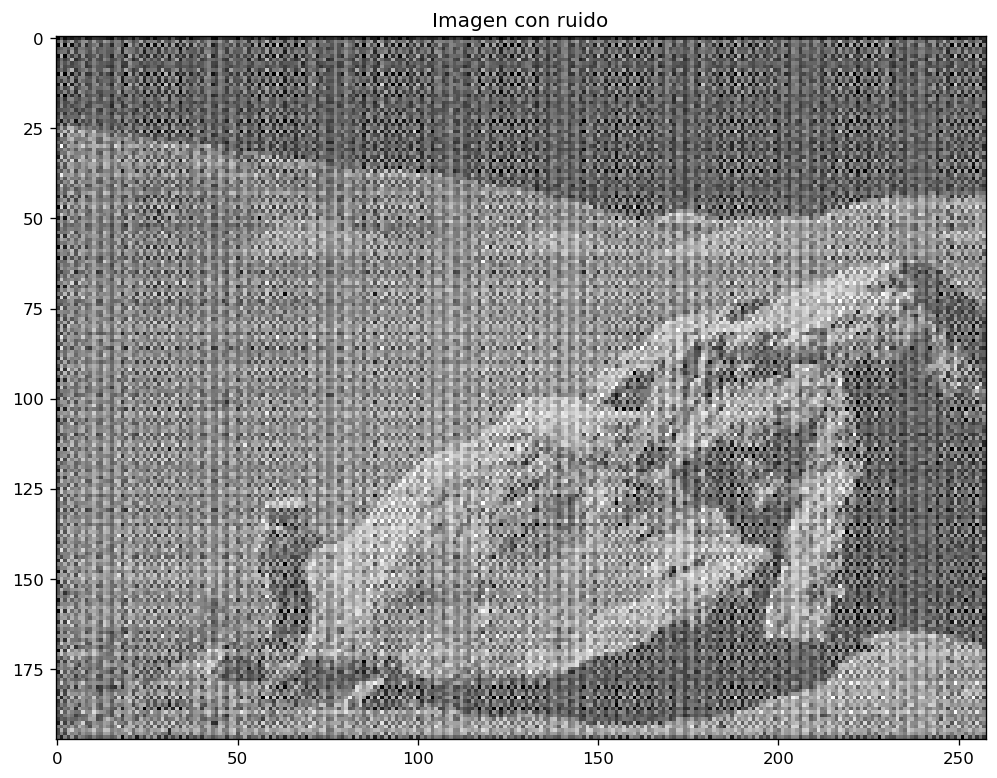

In [17]:
newImg = ifft2(filterImage).real
fig0, ax0 = plt.subplots(1, 1, figsize = (10,10), dpi=120)
ax0.imshow(newImg, plt.cm.gray)
ax0.set_title("Imagen sin ruido")
fig, ax = plt.subplots(1, 1, figsize = (10,10), dpi=120)
ax.imshow(img, plt.cm.gray)
ax.set_title("Imagen con ruido")
plt.show()